In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_n = 841
stride = 29
R = 1

In [3]:
from keras.datasets import fashion_mnist
data = fashion_mnist.load_data()
x_train = data[0][0]
y_train = data[0][1]
y_train.astype(int)
print("X_train Shape :=> ", x_train.shape)
print("Y_train Shape :=> ", y_train.shape)

Using TensorFlow backend.


X_train Shape :=>  (60000, 28, 28)
Y_train Shape :=>  (60000,)


In [4]:
x_train_norm = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
initial_weights = 0.1 * np.random.randn(num_n, 784)

weights = np.zeros((num_n, 784), np.double)

In [5]:
def check_Availability(n, n2, dim, stride):
    if dim == 1:
        if n < 0 or n >= stride:
            return False
    else:
        if n < 0 or n >= stride or n2 < 0 or n2 >= stride:
            return False
        else:
            return True


def update_Weight(R, Rect, k, change, Alpha, data, weight, winner, stride, num_n):
    change[k] = np.max(abs(Alpha * (data[k].reshape(-1) - weight[
        winner].reshape(-1))))  # inja miad ekhtelafe tak tak pixel haye y tasvir ro hesab mikone max migire
    weight[winner] = weight[winner].reshape(-1) - Alpha * (data[k].reshape(-1) - weight[winner].reshape(-1))
    if R == 1 and Rect == 0:
        if check_Availability(winner - 1, 0, 1, num_n) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[winner - 1]))))
            weight[winner - 1] = weight[winner - 1] - Alpha * (data[k] - weight[winner - 1])
        if check_Availability(winner + 1, 0, 1, num_n) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[winner + 1]))))
            weight[winner + 1] = weight[winner + 1] - Alpha * (data[k] - weight[winner + 1])
    if Rect == 1:
        nei1 = int(winner / stride)
        nei2 = (winner % stride) - 1
        if check_Availability(nei1, nei2, 2, stride) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[nei1 * stride + nei2]))))
            weight[nei1 * stride + nei2] = weight[nei1 * stride + nei2] - Alpha * (
                    data[k] - weight[nei1 * stride + nei2])

        nei1 = int(winner / stride)
        nei2 = (winner % stride) + 1
        if check_Availability(nei1, nei2, 2, stride) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[nei1 * stride + nei2]))))
            weight[nei1 * stride + nei2] = weight[nei1 * stride + nei2] - Alpha * (
                    data[k] - weight[nei1 * stride + nei2])

        nei1 = int(winner / stride) - 1
        nei2 = (winner % stride) - 1
        if check_Availability(nei1, nei2, 2, stride) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[nei1 * stride + nei2]))))
            weight[nei1 * stride + nei2] = weight[nei1 * stride + nei2] - Alpha * (
                    data[k] - weight[nei1 * stride + nei2])

        nei1 = int(winner / stride) - 1
        nei2 = (winner % stride)
        if check_Availability(nei1, nei2, 2, stride) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[nei1 * stride + nei2]))))
            weight[nei1 * stride + nei2] = weight[nei1 * stride + nei2] - Alpha * (
                    data[k] - weight[nei1 * stride + nei2])

        nei1 = int(winner / stride) - 1
        nei2 = (winner % stride) + 1
        if check_Availability(nei1, nei2, 2, stride) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[nei1 * stride + nei2]))))
            weight[nei1 * stride + nei2] = weight[nei1 * stride + nei2] - Alpha * (
                    data[k] - weight[nei1 * stride + nei2])

        nei1 = int(winner / stride) + 1
        nei2 = (winner % stride) - 1
        if check_Availability(nei1, nei2, 2, stride) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[nei1 * stride + nei2]))))
            weight[nei1 * stride + nei2] = weight[nei1 * stride + nei2] - Alpha * (
                    data[k] - weight[nei1 * stride + nei2])

        nei1 = int(winner / stride) + 1
        nei2 = (winner % stride)
        if check_Availability(nei1, nei2, 2, stride) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[nei1 * stride + nei2]))))
            weight[nei1 * stride + nei2] = weight[nei1 * stride + nei2] - Alpha * (
                    data[k] - weight[nei1 * stride + nei2])

        nei1 = int(winner / stride) + 1
        nei2 = (winner % stride) + 1
        if check_Availability(nei1, nei2, 2, stride) == True:
            change[k] = max(change[k], np.max(abs(Alpha * (data[k] - weight[nei1 * stride + nei2]))))
            weight[nei1 * stride + nei2] = weight[nei1 * stride + nei2] - Alpha * (
                    data[k] - weight[nei1 * stride + nei2])
    return change, weight


def train_SOM(R, Rect, data, initial_weight, stride, num_n):
    change = np.ones(data.shape[0], np.double)
    maxchange = 1
    Alpha = 0.6
    weight = initial_weight
    D = np.zeros(num_n, np.double)
    while maxchange > 0.0001:
        for k in range(data.shape[0]):
            for j in range(num_n):
                D[j] = np.sum((weight[j].reshape(-1) - data[k].reshape(-1)) ** 2)
            change, weight = update_Weight(R, Rect, k, change, Alpha, data, weight, np.argmin(D), stride, num_n)
        Alpha = 0.5 * Alpha
        maxchange = np.max(change)
        # print(maxchange)

    return weight


def SOM_Check(data, weight, labels, num_n):
    neurons = np.zeros((num_n, 10), np.double)
    winners = np.zeros(20, np.int)
    D = np.zeros(num_n, np.double)
    result = np.zeros((10, 20), int)
    for k in range(data.shape[0]):
        for j in range(num_n):
            D[j] = np.sum((weight[j].reshape(-1) - data[k].reshape(-1)) ** 2)
        mini = np.argmin(D)
        # print(type(mini))
        ind = labels[k].astype(int)
        neurons[mini][ind] += 1
    print('-----------------')
    for i in range(20):
        winners[i] = np.argmax(np.sum(neurons, axis=1))
        for j in range(10):
            result[j][i] = int(neurons[winners[i]][j])
            print(int(neurons[winners[i]][j]))
            neurons[winners[i]][j] = 0
        print('*******')
    print(result)
    plt.imshow(result, cmap='gray')
    plt.show()

-----------------
1
1
0
1
0
0
0
0
0
0
*******
0
0
0
0
0
2
0
0
1
0
*******
0
0
0
1
0
0
0
0
0
1
*******
0
2
0
0
0
0
0
0
0
0
*******
0
0
0
0
1
1
0
0
0
0
*******
2
0
0
0
0
0
0
0
0
0
*******
1
0
0
1
0
0
0
0
0
0
*******
0
0
1
0
0
0
1
0
0
0
*******
0
0
1
0
0
0
1
0
0
0
*******
0
2
0
0
0
0
0
0
0
0
*******
0
2
0
0
0
0
0
0
0
0
*******
0
0
0
0
0
0
0
2
0
0
*******
0
1
0
1
0
0
0
0
0
0
*******
0
0
0
0
0
1
0
0
1
0
*******
0
0
0
0
0
1
0
0
0
1
*******
0
0
1
0
0
0
1
0
0
0
*******
0
0
0
0
0
2
0
0
0
0
*******
0
0
0
0
0
0
1
1
0
0
*******
0
0
0
0
0
0
1
0
0
1
*******
0
1
1
0
0
0
0
0
0
0
*******
[[1 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 2 0 0 0 0 0 2 2 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 1 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0

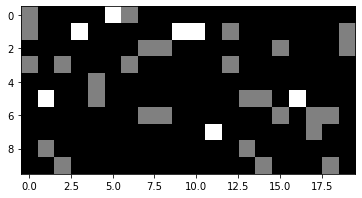

*****************************


In [6]:
neurons = 841
stride = 29
weight = train_SOM(R=1, Rect=0, data=x_train[0:1000], initial_weight=initial_weights, stride=stride, num_n=neurons)
SOM_Check(x_train[0:1000], weight, y_train[0:1000], neurons)

print("*****************************")